## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

For taking a sample from a population, we need to see the following:

    Define the population we are studying.
    Draw a representative sample from that population.
    Use analyses that incorporate the sampling error.


Our population comprise of:

    flights: The departure and arrival information about flights in US in years 2018 and 2019.
    fuel_comsumption: The fuel comsumption of different airlines from years 2015-2019 aggregated per month.
    passengers: The passenger totals on different routes from years 2015-2019 aggregated per month.
    

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [1]:
# package with hypothesis tests
import scipy.stats as st

In [3]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

### H0: mean_delay=0; Ha: mean_dealy !=0

In [5]:
df=pd.read_csv('flights_sample.csv')

In [6]:
df.columns

Index(['Unnamed: 0', 'fl_date', 'mkt_unique_carrier', 'branded_code_share',
       'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

C:\Users\User\anaconda3\envs\midproj_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

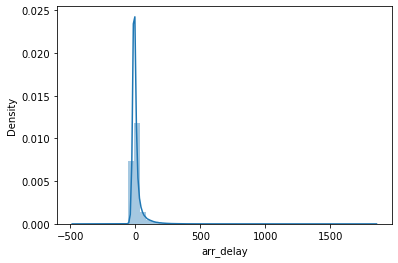

In [7]:
%matplotlib inline
sns.distplot(df.arr_delay)

In [8]:
print("Highest allowed (if normal)",df['arr_delay'].mean() + 3*df['arr_delay'].std())
print("Lowest allowed (if normal)",df['arr_delay'].mean() - 3*df['arr_delay'].std())

Highest allowed (if normal) 157.54184150343272
Lowest allowed (if normal) -146.32450799370255


In [9]:
st.ttest_1samp(df.arr_delay,0,nan_policy='omit')

Ttest_1sampResult(statistic=62.39889350789957, pvalue=0.0)

Since the p-value is 0, the mean of the sample is not equal to 0, hence delays are not from a normal distribution.

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [10]:
df.fl_date.head(2)

0    2018-01-01
1    2018-01-01
Name: fl_date, dtype: object

In [11]:
df['fl_date']=pd.to_datetime(df.fl_date, format='%Y-%m-%d')    

In [12]:
df['month'] = pd.DatetimeIndex(df['fl_date']).month

Text(0, 0.5, 'Mean delay')

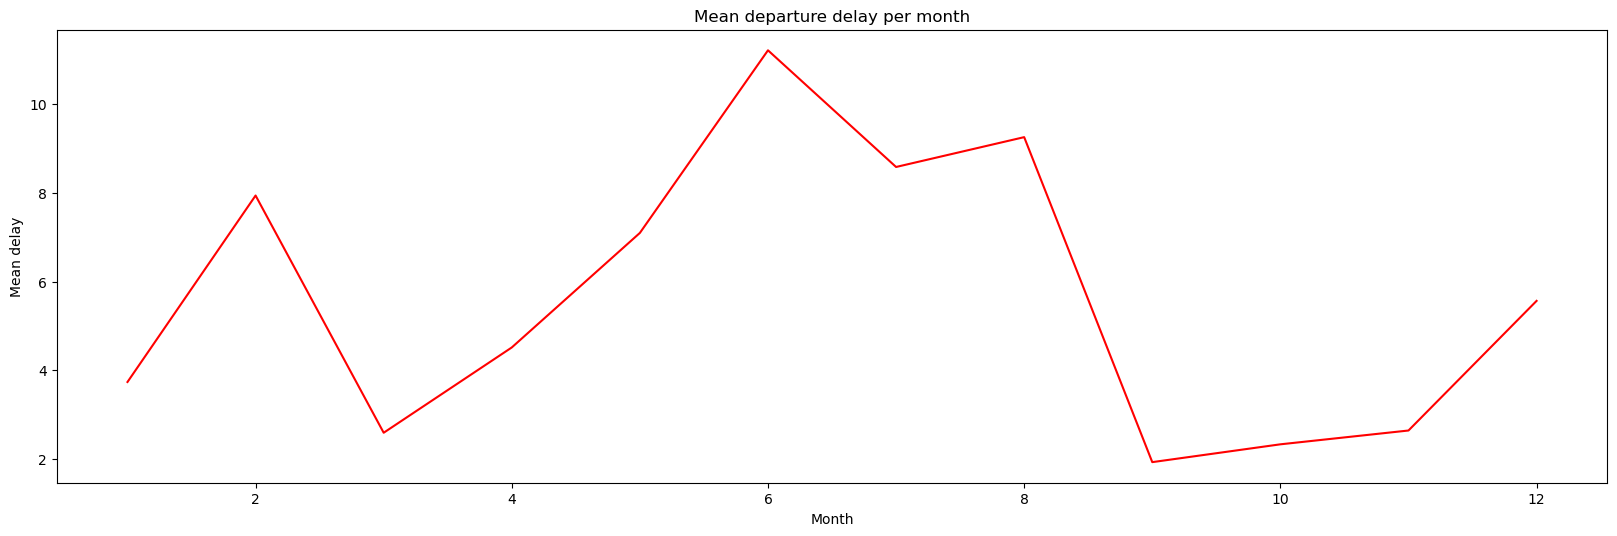

In [13]:
plt.figure(figsize=(20,6),dpi=100)
plt.plot(df['arr_delay'].groupby(df.month).mean(),'-r')
plt.title('Mean departure delay per month')
plt.xlabel('Month')
plt.ylabel('Mean delay')

Months June to Aug experience the most delays, maybe because of monsoon weather.

Text(0, 0.5, 'Median delay')

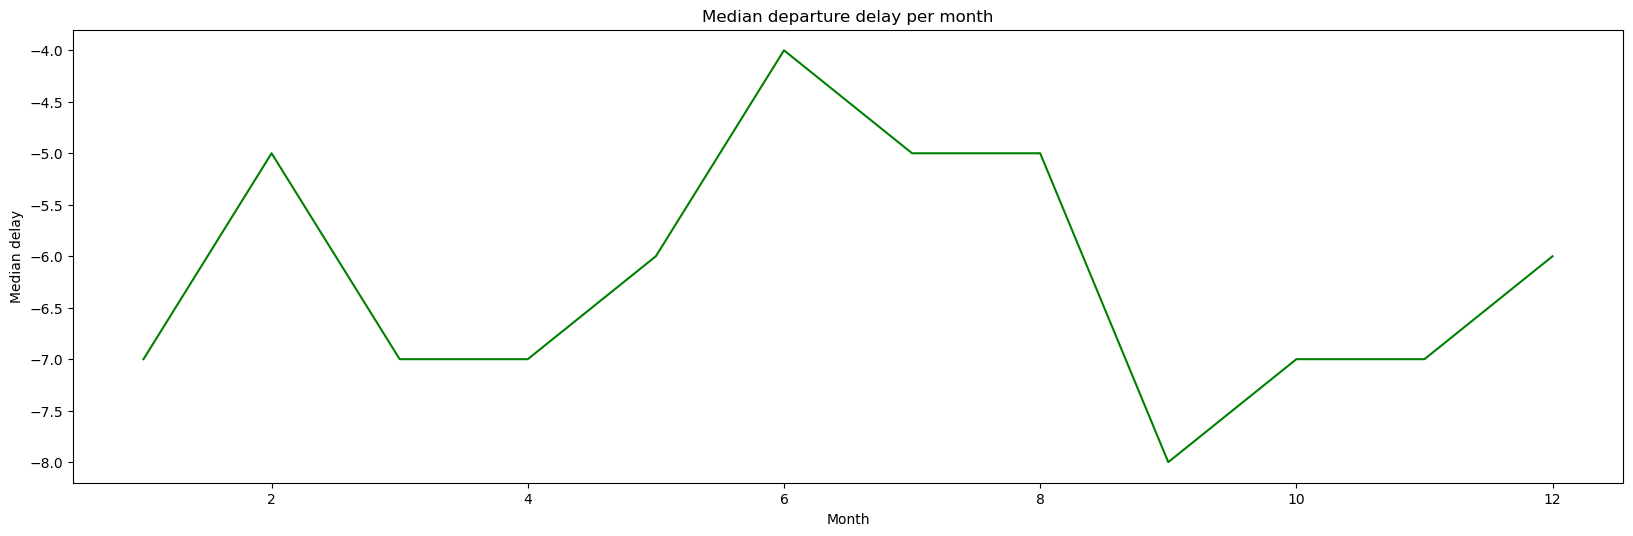

In [14]:
plt.figure(figsize=(20,6),dpi=100)
plt.plot(df['arr_delay'].groupby(df.month).median(),'-g')
plt.title('Median departure delay per month')
plt.xlabel('Month')
plt.ylabel('Median delay')

Median delay in negative tells us that the flights departed earlier 1 to 3 mins.

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [6]:
import requests as re
import os
import json
from IPython.display import JSON


In [11]:
# using os package we imported earlier
api_key = os.environ["WORLDWEATHER_API_KEY_3"]
# os.environ loads the dictionary with environmental variables where os.environ.keys() are all variable names


In [8]:
from WorldWeatherPy import DetermineListOfAttributes
from WorldWeatherPy import HistoricalLocationWeather
from WorldWeatherPy import RetrieveByAttribute

In [9]:
attributes = DetermineListOfAttributes(api_key, True).retrieve_list_of_options()

Retrieving attribute list...
List of available weather attributes: ['sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination', 'time', 'tempC', 'tempF', 'windspeedMiles', 'windspeedKmph', 'winddirDegree', 'winddir16Point', 'weatherCode', 'weatherIconUrl', 'weatherDesc', 'precipMM', 'precipInches', 'humidity', 'visibility', 'visibilityMiles', 'pressure', 'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC', 'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles', 'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'uvIndex']


In [27]:
df['origin_city_name'].unique()

array(['Atlanta, GA', 'Birmingham, AL', 'Allentown/Bethlehem/Easton, PA',
       'Tulsa, OK', 'Moline, IL', 'Tallahassee, FL', 'Springfield, MO',
       'Evansville, IN', 'Minneapolis, MN', 'Gainesville, FL',
       'Orlando, FL', 'Fort Myers, FL', 'Tampa, FL', 'Denver, CO',
       'Islip, NY', 'Washington, DC', 'Philadelphia, PA',
       'Fort Lauderdale, FL', 'Flint, MI', 'Spokane, WA',
       'Grand Rapids, MI', 'Houston, TX', 'Harlingen/San Benito, TX',
       'Wichita, KS', 'Indianapolis, IN', 'Las Vegas, NV', 'Detroit, MI',
       'Phoenix, AZ', 'New Orleans, LA', 'West Palm Beach/Palm Beach, FL',
       'Los Angeles, CA', 'Chicago, IL', 'Charlotte, NC', 'Columbus, OH',
       'Boston, MA', 'Albuquerque, NM', 'New York, NY', 'St. Louis, MO',
       'Dallas/Fort Worth, TX', 'San Diego, CA', 'Tucson, AZ',
       'Miami, FL', 'Kansas City, MO', 'Raleigh/Durham, NC', 'Newark, NJ',
       'Anchorage, AK', 'Albany, NY', 'San Francisco, CA',
       'Baltimore, MD', 'Portland, OR', 'Myrt

In [32]:
'Allentown/Bethlehem/Easton, PA'.split('/')[-1]

'Easton, PA'

In [ ]:
attribute_list=['weatherDesc']

for city in df['origin_city_name'].unique()[115:]:
    if city.find('/'):
        city=city.split('/')[-1]
    city=city.replace(" ","")
    try:
        dataset = RetrieveByAttribute(api_key, attribute_list, city, '2018-01-01', '2019-12-31', frequency=1,\
                                 verbose=False,csv_directory='weather').retrieve_hist_data()
    except ConnectionError:
        break

In [147]:
#df_weather=df[['fl_date','arr_delay','origin_city_name','dest_city_name','crs_dep_time','crs_arr_time']].sort_values(by='arr_delay',ascending=False).reset_index().head(250)
df_weather=df[['fl_date','arr_delay','origin_city_name','dest_city_name','crs_dep_time','crs_arr_time']]

In [105]:
df_weather.drop(columns='crs_dep_hour',inplace=True)

In [148]:
df_weather.dtypes

fl_date             datetime64[ns]
arr_delay                  float64
origin_city_name            object
dest_city_name              object
crs_dep_time                 int64
crs_arr_time                 int64
dtype: object

In [150]:
df_weather['crs_dep_hour']=pd.to_datetime(df_weather['crs_dep_time'], format='%H%M',errors='coerce').dt.hour

<ipython-input-150-738d439cf00e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather['crs_dep_hour']=pd.to_datetime(df_weather['crs_dep_time'], format='%H%M',errors='coerce').dt.hour


In [151]:
df_weather['crs_arr_hour']=pd.to_datetime(df_weather['crs_arr_time'], format='%H%M',errors='coerce').dt.hour

<ipython-input-151-bdbec4df4529>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather['crs_arr_hour']=pd.to_datetime(df_weather['crs_arr_time'], format='%H%M',errors='coerce').dt.hour


In [152]:
df_weather['crs_dep_hour'].dtypes

dtype('float64')

In [153]:
df_weather.head(2)

,fl_date,arr_delay,origin_city_name,dest_city_name,crs_dep_time,crs_arr_time,crs_dep_hour,crs_arr_hour
0,2018-01-01,59.0,"Atlanta, GA","Birmingham, AL",1250,1244,12.0,12.0
1,2018-01-01,42.0,"Birmingham, AL","Atlanta, GA",1320,1524,13.0,15.0


In [129]:
url = f"https://api.worldweatheronline.com/premium/v1/past-weather.ashx?format=json&key={api_key}&\
q={df_weather.loc[1,'origin_city_name']}&date={df_weather.loc[1,'fl_date']}&tp={df_weather.loc[1,'crs_dep_hour']}"


In [130]:
res=re.get(url)

In [131]:
res.status_code

200

In [132]:
print(res.json())

{'data': {'request': [{'type': 'City', 'query': 'San Jose, United States of America'}], 'weather': [{'date': '2019-03-03', 'astronomy': [{'sunrise': '06:36 AM', 'sunset': '06:03 PM', 'moonrise': '05:12 AM', 'moonset': '03:31 PM', 'moon_phase': 'Waning Crescent', 'moon_illumination': '20'}], 'maxtempC': '15', 'maxtempF': '59', 'mintempC': '11', 'mintempF': '51', 'avgtempC': '13', 'avgtempF': '56', 'totalSnow_cm': '0.0', 'sunHour': '7.3', 'uvIndex': '3', 'hourly': [{'time': '0', 'tempC': '13', 'tempF': '55', 'windspeedMiles': '10', 'windspeedKmph': '16', 'winddirDegree': '171', 'winddir16Point': 'S', 'weatherCode': '119', 'weatherIconUrl': [{'value': 'http://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0003_white_cloud.png'}], 'weatherDesc': [{'value': 'Cloudy'}], 'precipMM': '0.1', 'precipInches': '0.0', 'humidity': '89', 'visibility': '10', 'visibilityMiles': '6', 'pressure': '1016', 'pressureInches': '30', 'cloudcover': '81', 'HeatIndexC': '13', 'HeatIndexF': '55', 'Dew

In [ ]:
url = f"https://api.worldweatheronline.com/premium/v1/past-weather.ashx?format=json&key={api_key}&"
        
def request_function(date,city,time):
    q=city.replace(" ","")
    res=re.get(url+f"q={q}&date={date}&tp=1")
    if res.status_code==200:
        return res.json()['data']['weather'][0]['hourly'][time]['weatherDesc'][0]['value']
    else:
        return None

df_weather['weather_origin']= df_weather[~df_weather['crs_dep_hour'].isnull()].apply(lambda row : request_function(row['fl_date'],row['origin_city_name'],\
                                                                             int(row['crs_dep_hour'])),axis=1)


In [144]:


df_weather['weather_dest']=df_weather[~df_weather['crs_arr_hour'].isnull()].apply(lambda row : request_function(row['fl_date'],row['dest_city_name'],\
                                                                             int(row['crs_arr_hour'])),axis=1)

In [135]:
df_weather['weather_origin'].head()

0            Sunny
1            Sunny
2    Partly cloudy
3            Sunny
4         Overcast
Name: weather_origin, dtype: object

In [146]:
df_weather['weather_dest'].tail()

245                            Clear
246                            Clear
247                       Heavy snow
248             Patchy rain possible
249    Moderate or heavy rain shower
Name: weather_dest, dtype: object

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [13]:
df.columns

Index(['Unnamed: 0', 'fl_date', 'mkt_unique_carrier', 'branded_code_share',
       'mkt_carrier', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [25]:
df['total_taxi_time']=df['taxi_out']+df['taxi_in']

array([[<AxesSubplot:title={'center':'total_taxi_time'}>]], dtype=object)

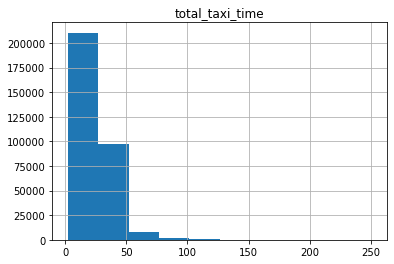

In [26]:
%matplotlib inline
df.hist('total_taxi_time')

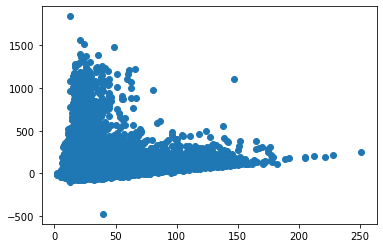

In [27]:

plt.scatter(df['total_taxi_time'],df['arr_delay'])

In [28]:
df['crs_dep_time'].head()

0    1250
1    1320
2     600
3    1335
4    1526
Name: crs_dep_time, dtype: int64

In [29]:
import datetime as dt


In [19]:
df['hour']=pd.to_datetime(df['crs_dep_time'], format='%H%M',errors='coerce').dt.hour

In [20]:
df['hour'].dtypes

dtype('float64')

In [23]:
df['hour']=df['hour'][~df['hour'].isnull()].astype(int)

Text(0, 0.5, 'Mean taxi time')

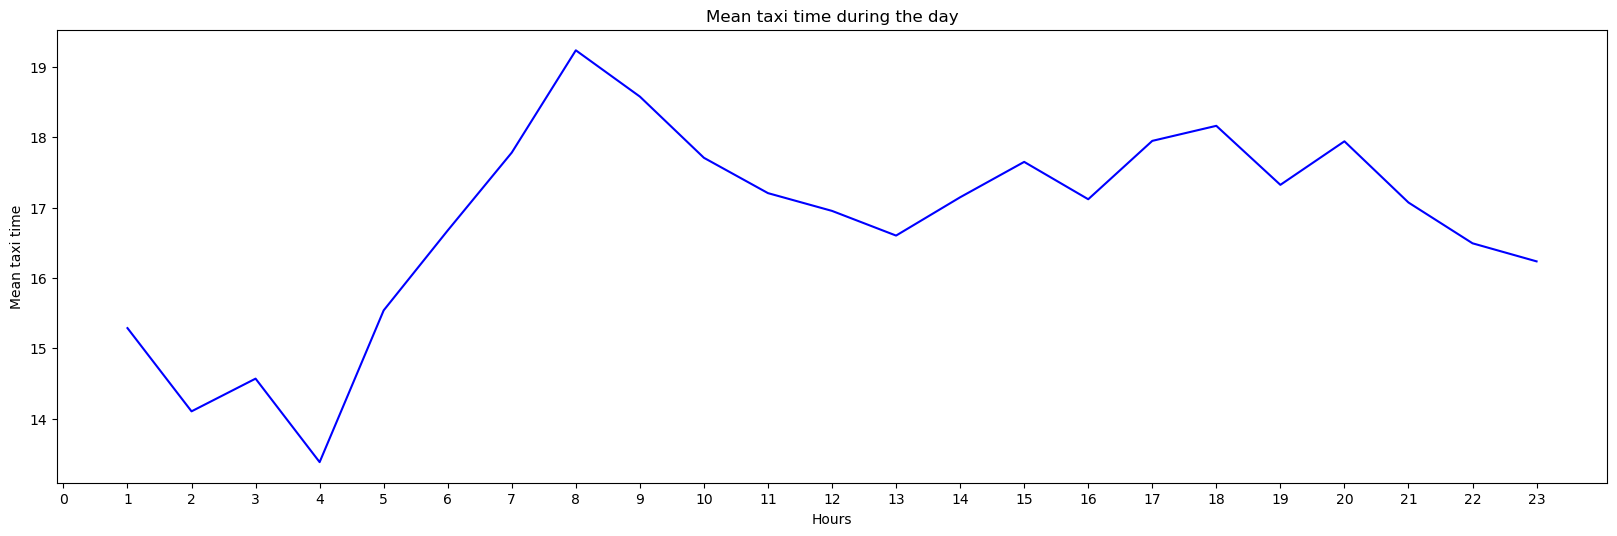

In [28]:
plt.figure(figsize=(20,6),dpi=100)
plt.plot(df['taxi_out'].groupby(df.hour).mean(),'-b')
plt.title('Mean taxi time during the day')
plt.xlabel('Hours')
plt.xticks(range(0,24))
plt.ylabel('Mean taxi time')


Text(0, 0.5, 'Median taxi time')

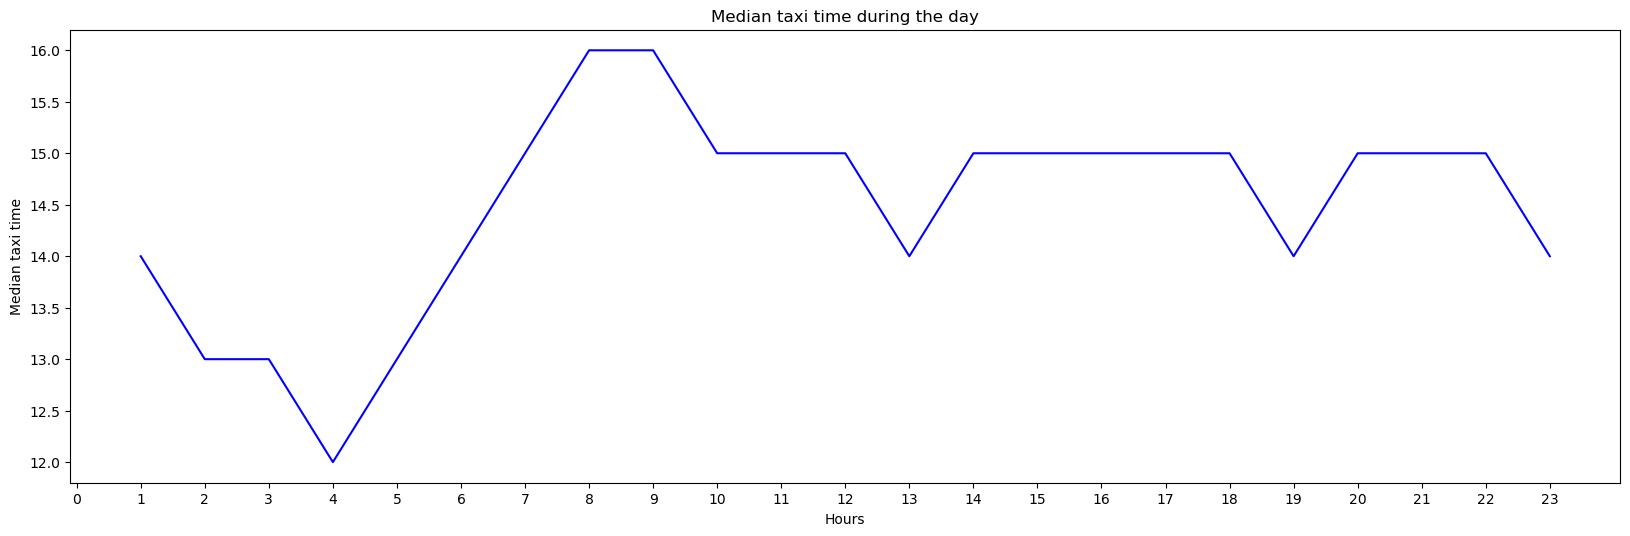

In [29]:
plt.figure(figsize=(20,6),dpi=100)
plt.plot(df['taxi_out'].groupby(df.hour).median(),'-b')
plt.title('Median taxi time during the day')
plt.xlabel('Hours')
plt.xticks(range(0,24))
plt.ylabel('Median taxi time')

In [30]:
df['arr_hour']=pd.to_datetime(df['crs_arr_time'], format='%H%M',errors='coerce').dt.hour

In [31]:
df['arr_hour']=df['arr_hour'][~df['arr_hour'].isnull()].astype(int)

Text(0, 0.5, 'Median taxi-in time')

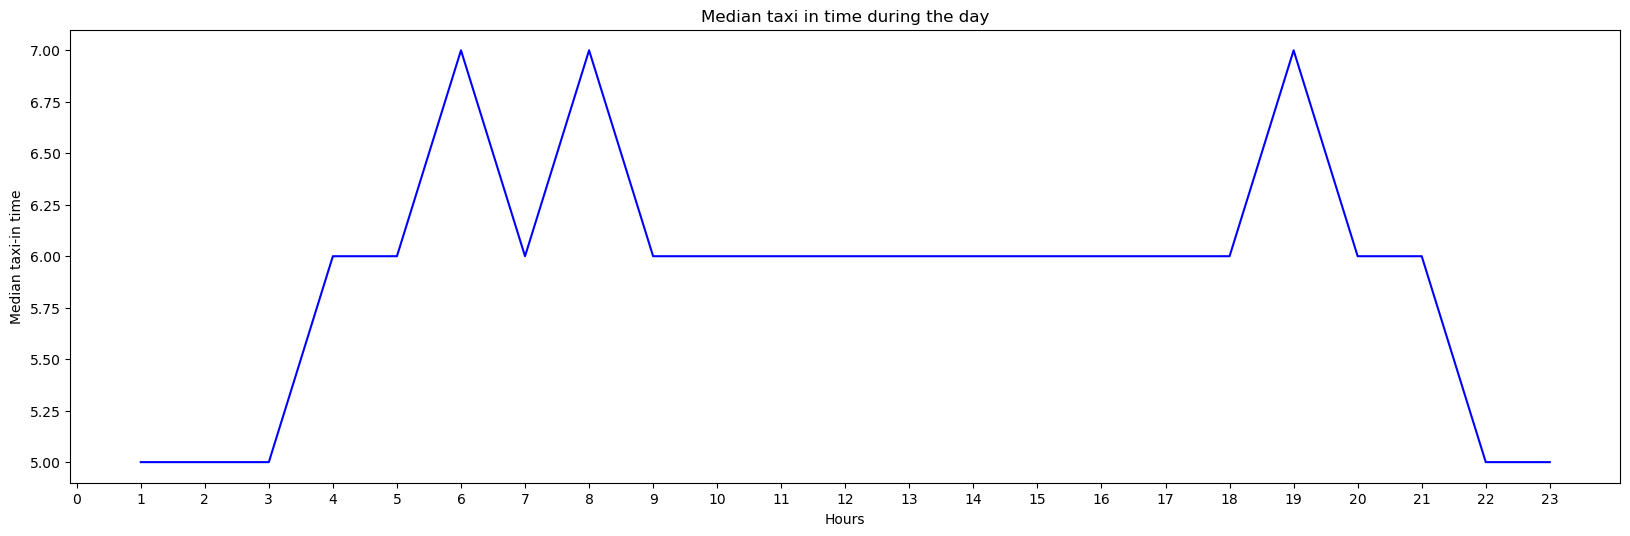

In [32]:
plt.figure(figsize=(20,6),dpi=100)
plt.plot(df['taxi_in'].groupby(df.arr_hour).median(),'-b')
plt.title('Median taxi in time during the day')
plt.xlabel('Hours')
plt.xticks(range(0,24))
plt.ylabel('Median taxi-in time')

Text(0, 0.5, 'Mean taxi-in time')

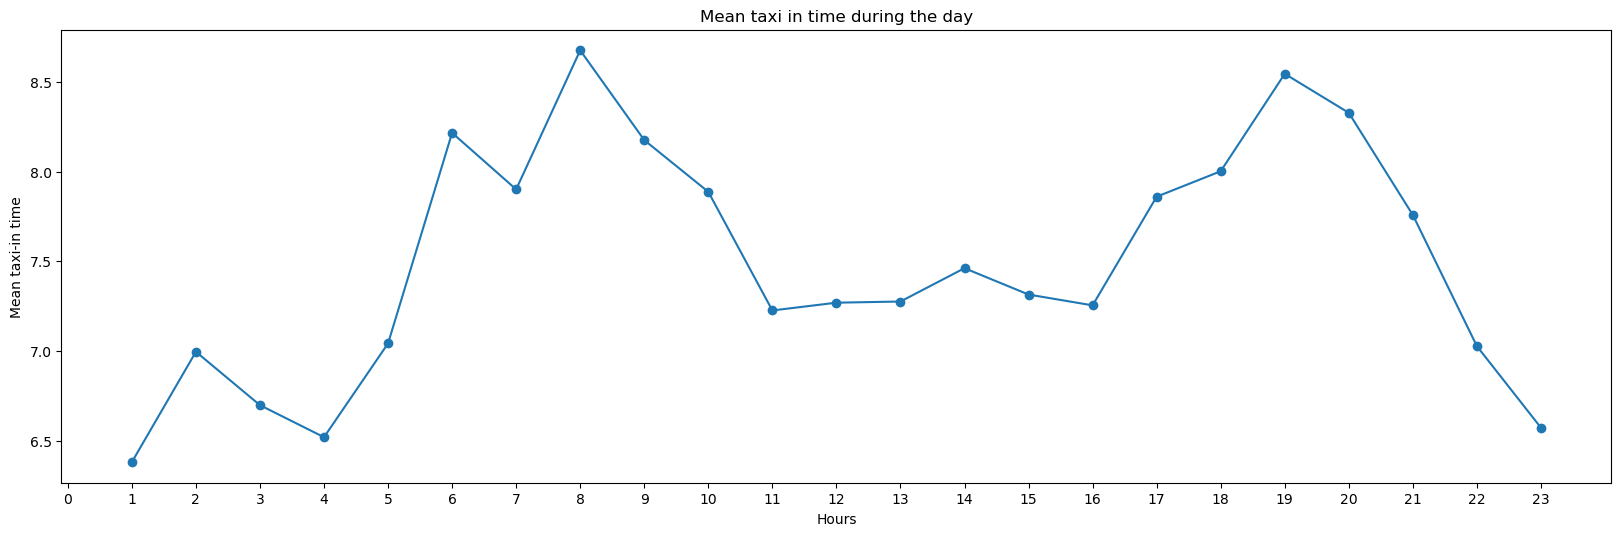

In [33]:
plt.figure(figsize=(20,6),dpi=100)
plt.plot(df['taxi_in'].groupby(df.arr_hour).mean(),'-o')
plt.title('Mean taxi in time during the day')
plt.xlabel('Hours')
plt.xticks(range(0,24))
plt.ylabel('Mean taxi-in time')

Taxi-out time is more during the day and through the night til 11 PM. As for taxi-in time, there is a difference of about 2 mins between different hours of the day.

In [46]:
#Higher traffic leading to more taxi times? Yay or nay?
df['traffic_arr']=df['total_taxi_time'].groupby([df.fl_date,df.arr_hour]).transform('count')


In [48]:
df.drop(columns='traffic',inplace=True)

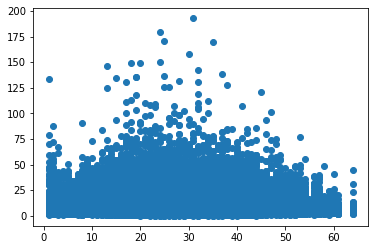

In [42]:
plt.scatter(df['traffic_arr'],df['taxi_in'])

In [49]:
#Higher traffic leading to more taxi times? Yay or nay?
df['traffic_dep']=df['total_taxi_time'].groupby([df.fl_date,df.hour]).transform('count')


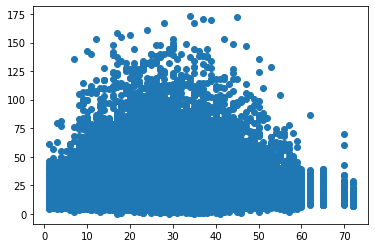

In [50]:
plt.scatter(df['traffic_dep'],df['taxi_out'])

Higher traffic does not necessarily imply longer taxi times

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [54]:
df.drop(columns='perc_delay',inplace=True)

In [56]:
df[df.dep_delay>0].shape[0]/df[df.arr_delay>0].shape[0]

0.9798329891353147

Almost all of the delayed flights are delayed by departure.

In [58]:
df[df.arr_delay==0].shape[0]/df[df.dep_delay>0].shape[0]

0.054543455151937245

Only a few flights managed to lower the delay during flights

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

### H0: Planes fly faster when there is departure delay (Speed > for delayed flights)

In [ ]:
st.ttest_ind_from_stats(df['dep_delay'],df['distance']/df['air_time'])

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [6]:
df_p=pd.read_csv('passengers_sample.csv')

In [50]:
df_p.iloc[:10,:3]

,Unnamed: 0,departures_scheduled,departures_performed
0,0,0.0,1.0
1,1,0.0,1.0
2,2,0.0,2.0
3,3,0.0,1.0
4,4,0.0,1.0
5,5,0.0,1.0
6,6,0.0,1.0
7,7,0.0,1.0
8,8,0.0,1.0
9,9,0.0,17.0


In [51]:
#Figuring out what values are present in departures_scheduled
df_p.departures_scheduled.value_counts()

0.0      113761
1.0       30601
2.0       11791
4.0        9501
3.0        9105
          ...  
892.0         1
890.0         1
864.0         1
863.0         1
599.0         1
Name: departures_scheduled, Length: 458, dtype: int64

In [52]:
#Figuring out what values are present in departures_scheduled
df_p.departures_performed.value_counts()

1.0      82846
2.0      22764
3.0      14799
4.0      14165
5.0       9439
         ...  
443.0        1
845.0        1
527.0        1
842.0        1
859.0        1
Name: departures_performed, Length: 514, dtype: int64

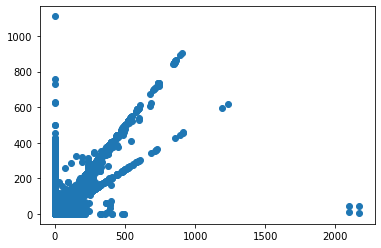

In [54]:
plt.scatter(df_p.departures_scheduled,df_p.departures_performed)

### EDA for Passengers table

#### Univariate analysis

In [155]:
df_p.head()

,Unnamed: 0,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0,0.0,1.0,60000.0,0.0,0.0,17012.0,0.0,1706.0,242.0,...,MX,Mexico,7,715,2,2019,6,4,P,IU
1,1,0.0,1.0,5600.0,0.0,0.0,0.0,0.0,194.0,50.0,...,CA,Canada,6,681,2,2019,6,1,P,IU
2,2,0.0,2.0,120000.0,0.0,0.0,19804.0,0.0,194.0,115.0,...,CA,Canada,7,715,2,2019,6,1,P,IU
3,3,0.0,1.0,36000.0,0.0,0.0,7940.0,0.0,181.0,57.0,...,CA,Canada,6,655,2,2019,6,1,P,IU
4,4,0.0,1.0,5600.0,0.0,0.0,1128.0,0.0,181.0,50.0,...,CA,Canada,6,681,2,2019,6,1,P,IU


In [156]:
df_p.dtypes


Unnamed: 0                 int64
departures_scheduled     float64
departures_performed     float64
payload                  float64
seats                    float64
passengers               float64
freight                  float64
mail                     float64
distance                 float64
ramp_to_ramp             float64
air_time                 float64
unique_carrier            object
airline_id                 int64
unique_carrier_name       object
region                    object
carrier                   object
carrier_name              object
carrier_group              int64
carrier_group_new          int64
origin_airport_id          int64
origin_city_market_id      int64
origin                    object
origin_city_name          object
origin_country            object
origin_country_name       object
dest_airport_id            int64
dest_city_market_id        int64
dest                      object
dest_city_name            object
dest_country              object
dest_count

In [157]:
df_p.describe()

,Unnamed: 0,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,...,origin_airport_id,origin_city_market_id,dest_airport_id,dest_city_market_id,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group
count,330348.0000,330348.000000,330348.000000,3.303480e+05,330348.000000,330348.000000,3.303480e+05,3.303480e+05,330348.000000,330348.000000,...,330348.000000,330348.000000,330348.000000,330348.000000,330348.000000,330348.000000,330348.000000,330348.000000,330348.000000,330348.000000
mean,165173.5000,20.071031,22.599565,8.500989e+05,2543.768293,2075.374908,1.075298e+05,2.867157e+03,1041.147802,2872.436894,...,12815.040920,32103.166010,12807.420747,32093.012756,5.503793,605.061605,1.220997,2017.029536,6.562610,2.633063
std,95363.3977,38.554369,36.381206,1.567818e+06,4835.385440,4040.013339,6.248058e+05,2.573874e+04,1254.119383,5290.677514,...,1617.299253,1540.407917,1618.115599,1533.306804,1.555844,167.872943,0.536239,1.420383,3.476221,2.483395
min,0.0000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,10005.000000,30003.000000,10005.000000,30005.000000,0.000000,10.000000,1.000000,2015.000000,1.000000,1.000000
25%,82586.7500,0.000000,1.000000,3.817000e+04,50.000000,8.000000,0.000000e+00,0.000000e+00,280.000000,111.000000,...,11298.000000,30852.000000,11298.000000,30852.000000,6.000000,614.000000,1.000000,2016.000000,4.000000,1.000000
50%,165173.5000,3.000000,9.000000,2.444615e+05,456.000000,329.000000,0.000000e+00,0.000000e+00,655.000000,635.000000,...,12892.000000,31703.000000,12892.000000,31703.000000,6.000000,631.000000,1.000000,2017.000000,7.000000,2.000000
75%,247760.2500,28.000000,30.000000,1.048718e+06,3300.000000,2601.000000,3.461250e+03,0.000000e+00,1235.000000,3634.000000,...,14100.000000,33195.000000,14100.000000,33192.000000,6.000000,692.000000,1.000000,2018.000000,10.000000,3.000000
max,330347.0000,2170.000000,1111.000000,1.524600e+08,110336.000000,95777.000000,1.316640e+08,8.163150e+06,9886.000000,147761.000000,...,16869.000000,36830.000000,16869.000000,36836.000000,8.000000,889.000000,4.000000,2019.000000,12.000000,20.000000


In [158]:
df_p[df_p.payload==0]

,Unnamed: 0,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
999,999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,509.0,0.0,...,US,United States,6,622,1,2019,9,2,L,DU
1169,1169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,...,US,United States,0,79,1,2019,12,1,F,DU
1170,1170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,...,US,United States,0,79,1,2019,12,1,F,DU
1281,1281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,314.0,0.0,...,US,United States,6,614,1,2019,12,1,L,DU
1583,1583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164.0,0.0,...,US,United States,4,405,2,2019,7,1,G,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330238,330238,327.0,0.0,0.0,0.0,0.0,0.0,0.0,746.0,0.0,...,US,United States,8,819,1,2015,8,2,F,DU
330253,330253,330.0,0.0,0.0,0.0,0.0,0.0,0.0,746.0,0.0,...,US,United States,8,819,1,2015,7,2,F,DU
330256,330256,331.0,0.0,0.0,0.0,0.0,0.0,0.0,746.0,0.0,...,US,United States,8,819,1,2015,7,2,F,DU
330295,330295,408.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,0.0,...,US,United States,8,819,1,2015,3,1,F,DU


{'whiskers': [<matplotlib.lines.Line2D at 0x1db01f1b8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1db015a6b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db01f1bb20>],
 'medians': [<matplotlib.lines.Line2D at 0x1db015a66d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1db508e7700>],
 'means': []}

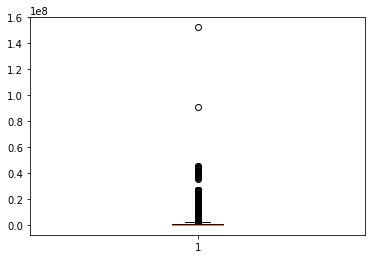

In [160]:
plt.boxplot(df_p.payload)

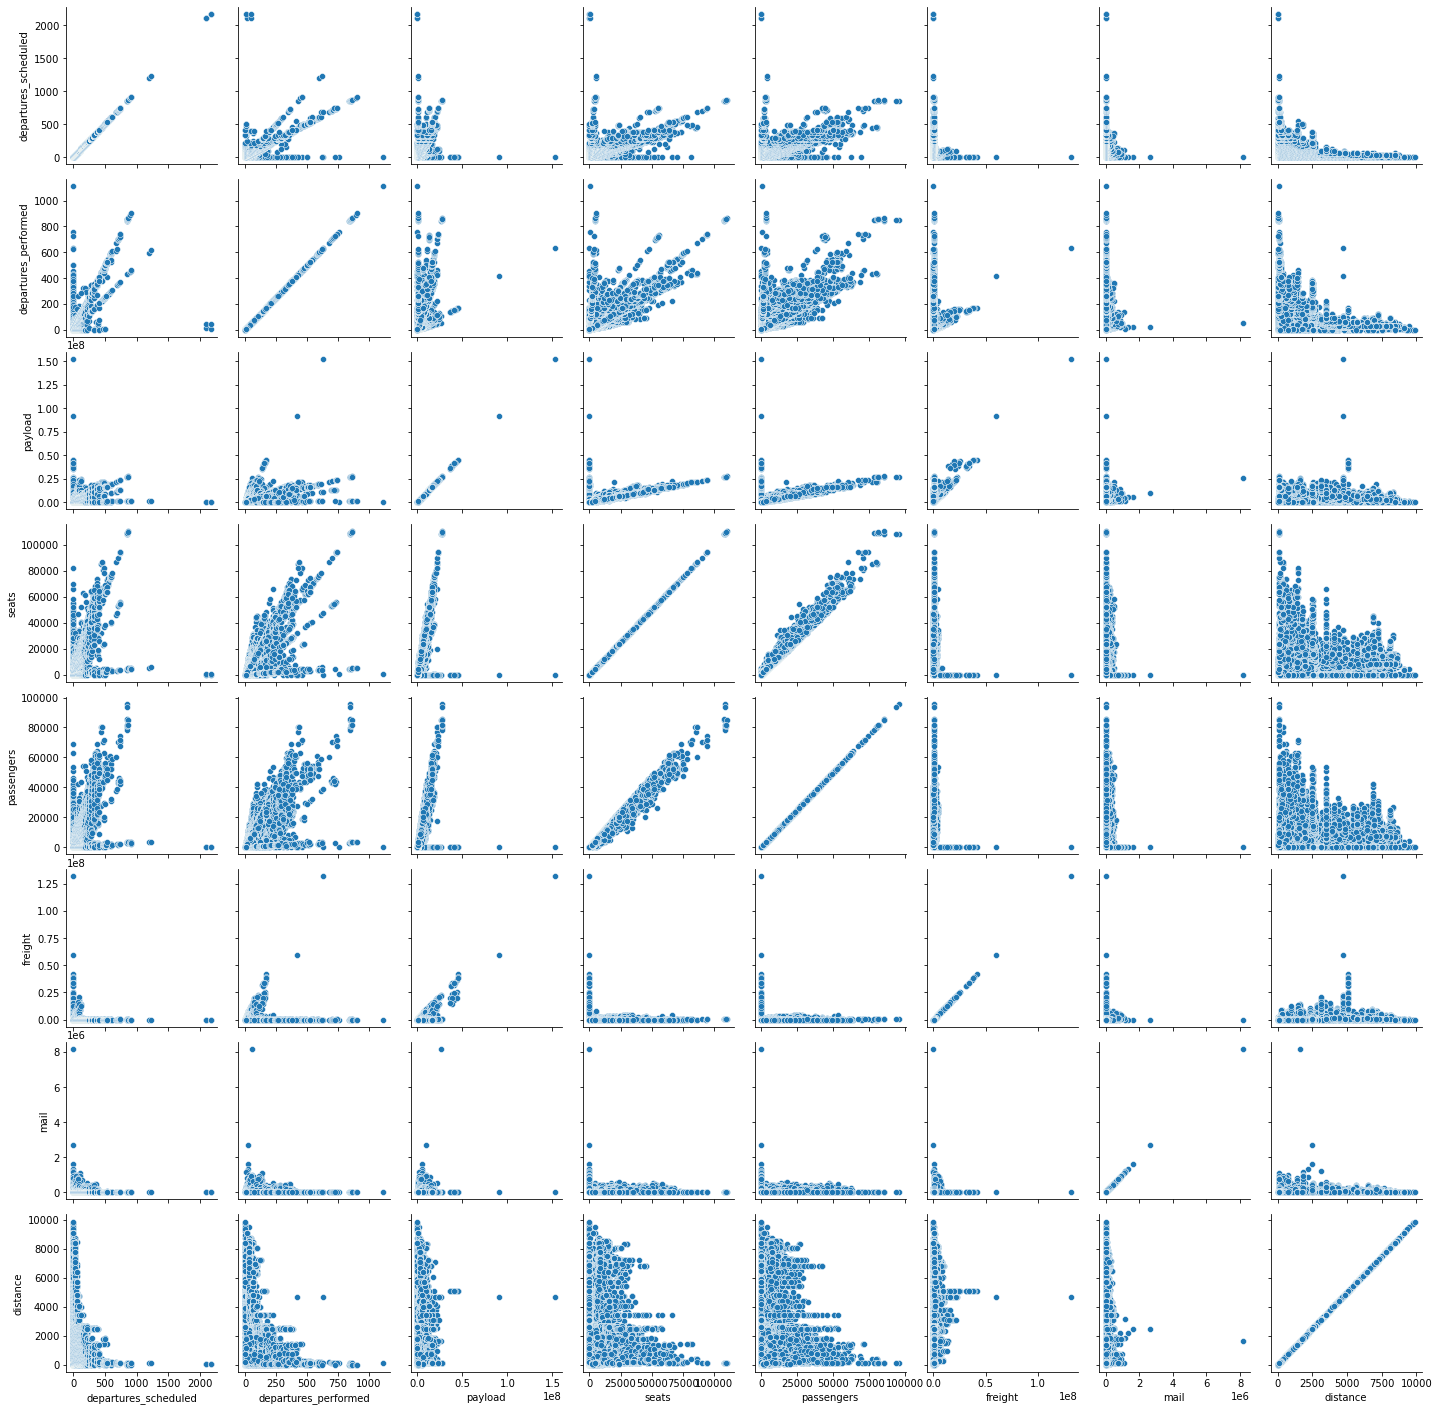

In [163]:
g = sns.PairGrid(df_p[['departures_scheduled','departures_performed','payload','seats','passengers','freight','mail',\
                       'distance']])
g.map(sns.scatterplot)

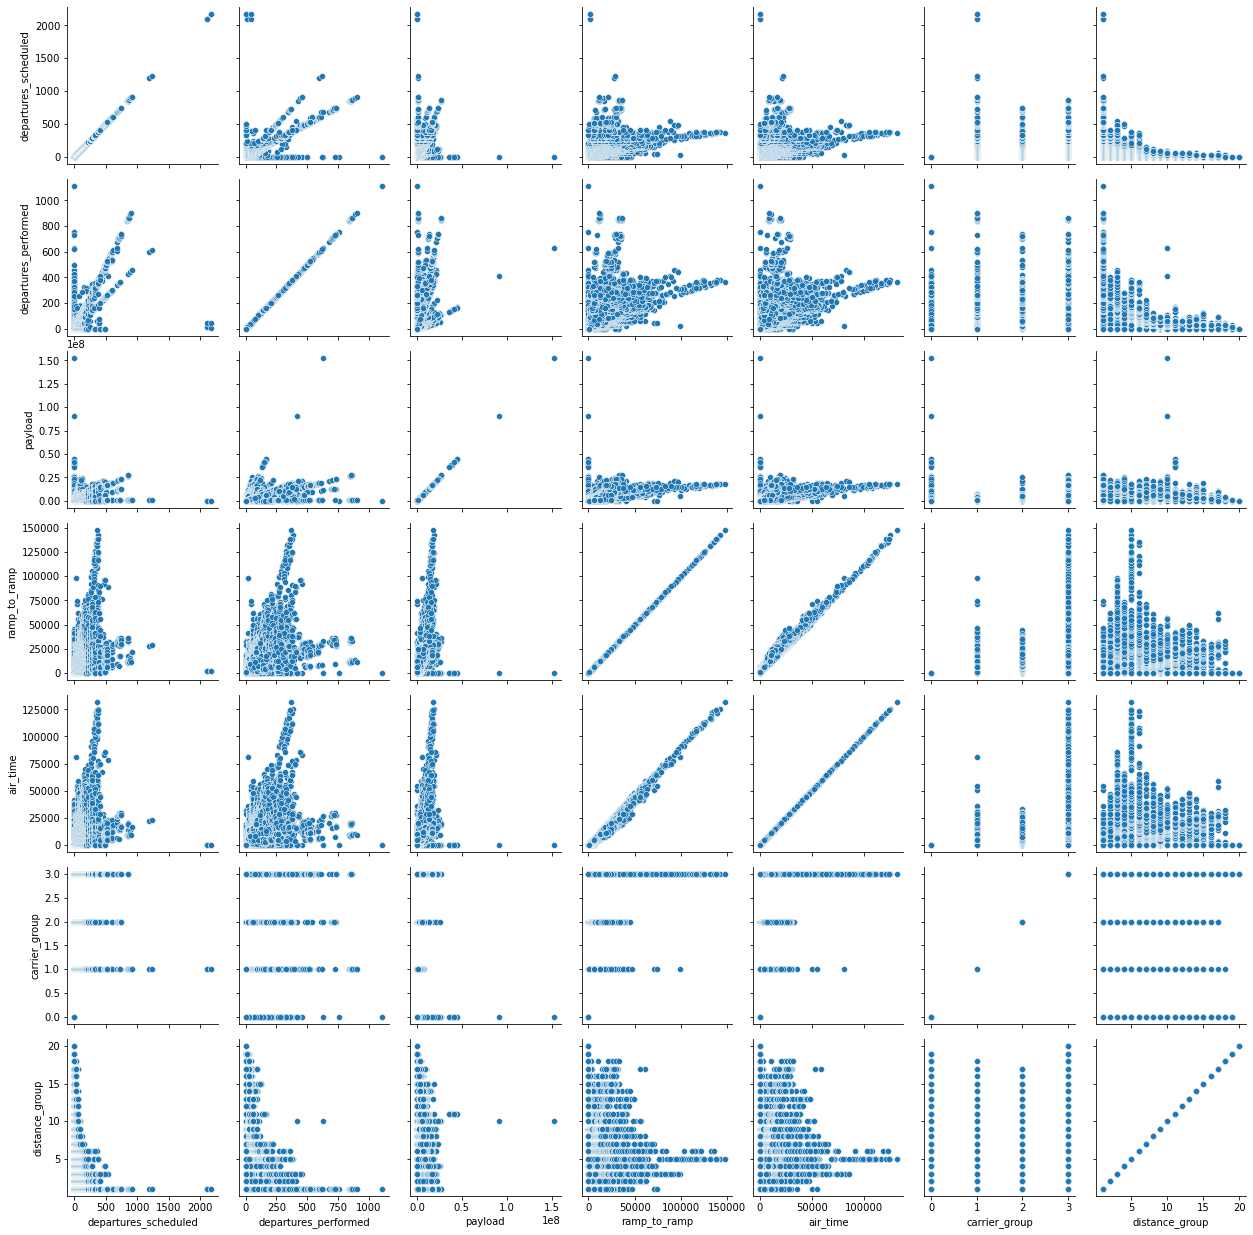

In [10]:
%matplotlib inline
g = sns.PairGrid(df_p[['departures_scheduled','departures_performed','payload','ramp_to_ramp','air_time','carrier_group','distance_group']])
g.map(sns.scatterplot)

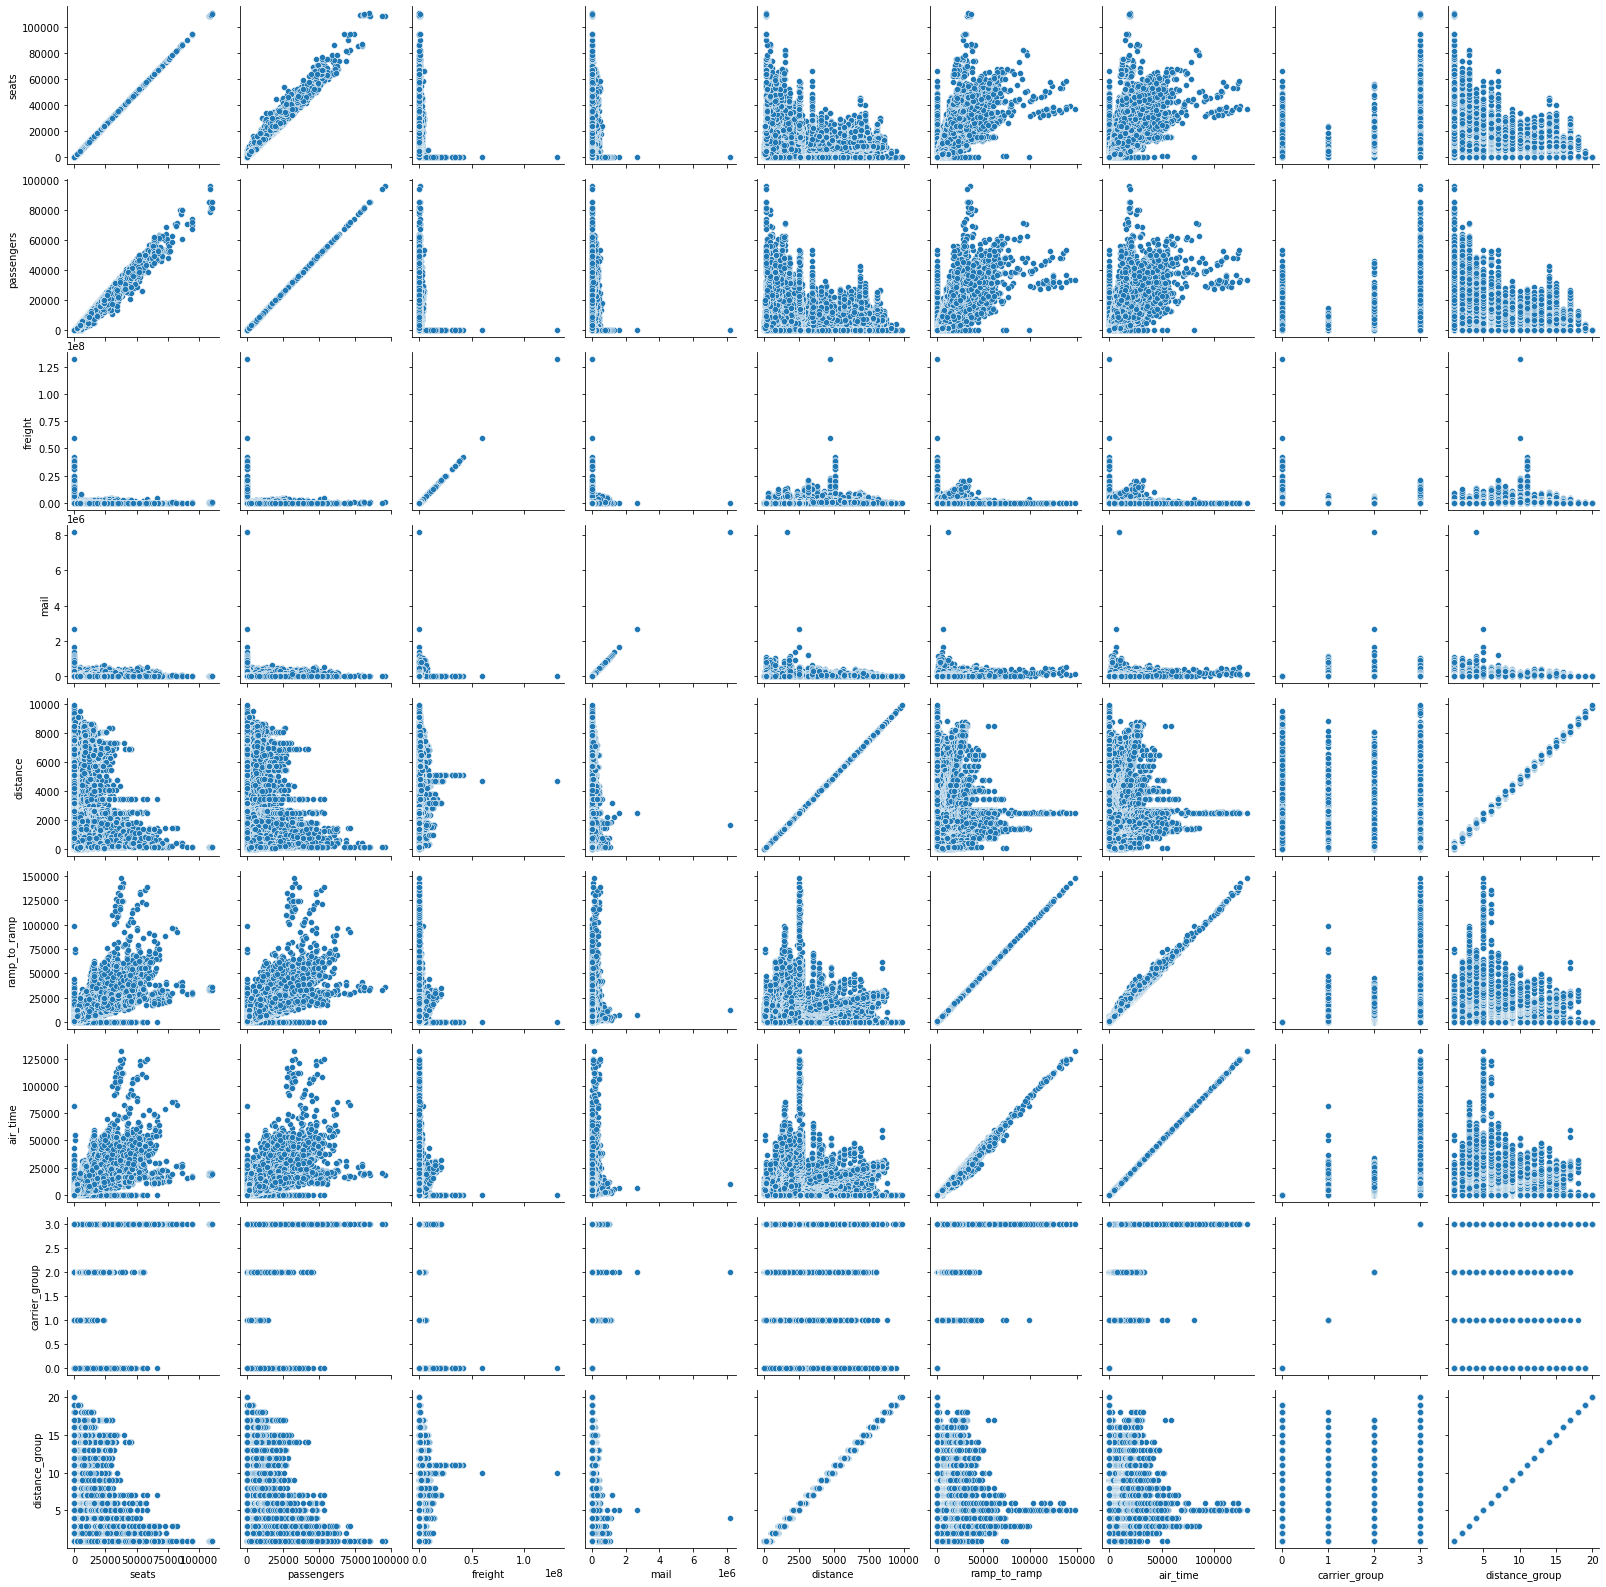

In [165]:
g = sns.PairGrid(df_p[['seats','passengers','freight','mail',\
                       'distance','ramp_to_ramp','air_time','carrier_group','distance_group']])
g.map(sns.scatterplot)

In [167]:
#check for dupes for Id
df_p.drop(['Unnamed: 0'],axis =1,inplace=True)


In [168]:
df_p['departures_performed'].describe()

count    330348.000000
mean         22.599565
std          36.381206
min           0.000000
25%           1.000000
50%           9.000000
75%          30.000000
max        1111.000000
Name: departures_performed, dtype: float64

C:\Users\User\anaconda3\envs\midproj_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='departures_performed', ylabel='Density'>

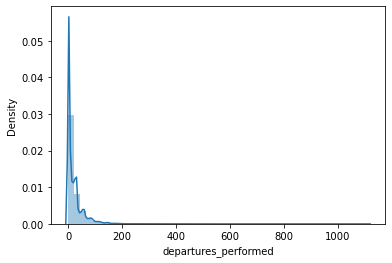

In [169]:
sns.distplot(df_p['departures_performed'])

In [60]:
X=df['fl_date']

In [64]:
#Transform 1
df['month'] = pd.DatetimeIndex(df['fl_date']).month

In [66]:
df.mkt_unique_carrier.unique()

array(['DL', 'F9', 'WN', 'AA', 'UA', 'AS', 'B6', 'HA', 'NK', 'G4', 'VX'],
      dtype=object)

In [67]:
#Transform 2
df_dummy = pd.get_dummies(df['mkt_unique_carrier'])

In [69]:
df.branded_code_share.unique() #can drop this one

array(['DL_CODESHARE', 'F9', 'WN', 'AA', 'UA', 'UA_CODESHARE', 'AS',
       'AA_CODESHARE', 'AS_CODESHARE', 'DL', 'B6', 'HA', 'NK', 'G4', 'VX',
       'HA_CODESHARE'], dtype=object)

In [70]:
df.mkt_carrier.unique() #can drop this one


array(['DL', 'F9', 'WN', 'AA', 'UA', 'AS', 'B6', 'HA', 'NK', 'G4', 'VX'],
      dtype=object)